# Classification of the sound with Machine Learning and visualization

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-and-load-data" data-toc-modified-id="Import-and-load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import and load data</a></span></li><li><span><a href="#I---Binary-classification" data-toc-modified-id="I---Binary-classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>I - Binary classification</a></span><ul class="toc-item"><li><span><a href="#1)-k-Nearest-Neighbour-(k-NN)" data-toc-modified-id="1)-k-Nearest-Neighbour-(k-NN)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1) k Nearest Neighbour (k-NN)</a></span><ul class="toc-item"><li><span><a href="#Fitting" data-toc-modified-id="Fitting-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Predicting" data-toc-modified-id="Predicting-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Predicting</a></span></li></ul></li><li><span><a href="#2)--Support-Vector-Machine-(SVM)" data-toc-modified-id="2)--Support-Vector-Machine-(SVM)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2)  Support Vector Machine (SVM)</a></span><ul class="toc-item"><li><span><a href="#Fitting" data-toc-modified-id="Fitting-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Predicting" data-toc-modified-id="Predicting-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Predicting</a></span></li></ul></li><li><span><a href="#3)-Random-Forest" data-toc-modified-id="3)-Random-Forest-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>3) Random Forest</a></span><ul class="toc-item"><li><span><a href="#Fitting" data-toc-modified-id="Fitting-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Predicting" data-toc-modified-id="Predicting-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Predicting</a></span></li></ul></li></ul></li><li><span><a href="#II---Multi-classification" data-toc-modified-id="II---Multi-classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>II - Multi classification</a></span><ul class="toc-item"><li><span><a href="#1)-k-Nearest-Neighbour-(k-NN)" data-toc-modified-id="1)-k-Nearest-Neighbour-(k-NN)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>1) k Nearest Neighbour (k-NN)</a></span><ul class="toc-item"><li><span><a href="#Fitting" data-toc-modified-id="Fitting-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Predicting" data-toc-modified-id="Predicting-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Predicting</a></span></li></ul></li><li><span><a href="#2)--Support-Vector-Machine-(SVM)" data-toc-modified-id="2)--Support-Vector-Machine-(SVM)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>2)  Support Vector Machine (SVM)</a></span><ul class="toc-item"><li><span><a href="#Fitting" data-toc-modified-id="Fitting-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Predicting" data-toc-modified-id="Predicting-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Predicting</a></span></li></ul></li><li><span><a href="#3)-Random-Forest" data-toc-modified-id="3)-Random-Forest-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>3) Random Forest</a></span><ul class="toc-item"><li><span><a href="#Fitting" data-toc-modified-id="Fitting-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Predicting" data-toc-modified-id="Predicting-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Predicting</a></span></li></ul></li></ul></li><li><span><a href="#III---UMAP-(visualization)" data-toc-modified-id="III---UMAP-(visualization)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>III - UMAP (visualization)</a></span></li></ul></div>

## Import and load data

In [1]:
from lib.File import File
from matplotlib import pyplot as plt
from data.loader import get_kasios_obs, get_obs, map_path
import numpy as np

from math import sqrt
import pandas as pd

In [2]:
# Loads files and makes conversion if necessary
df_all = get_obs(songs = True)
df_kasios = get_kasios_obs(songs = True)

Loading wav files...
Done.
Loading wav files...
Done.


In [3]:
# X = get_spectres(df_all) # Can be very long
# X.to_pickle("data/all_birds_freq.pickle") # Save to cache
X = pd.read_pickle("data/all_birds_freq.pickle") # Quicker to use cache

X.head()

,1900.0,1910.0,1920.0,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,...,5900.0,5910.0,5920.0,5930.0,5940.0,5950.0,5960.0,5970.0,5980.0,5990.0
File ID,,,,,,,,,,,,,,,,,,,,,
402254,-0.777891,-0.398350,-0.014216,-0.855008,2.075899,-0.221931,-0.655440,-1.191778,0.585549,0.236256,...,0.433391,0.306798,-1.075585,-0.452546,-0.197668,-0.996424,-0.379281,-0.244899,-0.400091,-0.611824
406171,-4.162661,-4.180349,-4.229848,-4.230835,-4.269890,-4.245544,-4.282711,-4.257561,-4.243178,-4.282526,...,-1.510778,-1.968467,-1.824303,-1.519034,-1.865900,-1.872201,-1.824038,-1.760304,-1.728515,-1.927553
405901,-0.580728,-0.633019,-0.707576,-0.645468,-0.603866,-0.725716,-0.672938,-0.657233,-0.662175,-0.732691,...,-0.300444,-0.458147,-0.586822,-0.149122,-0.337683,-0.258401,-0.292191,-0.543218,-0.267194,-0.134089
405548,-3.228091,-3.251748,-3.226915,-3.256686,-3.309930,-3.233574,-3.255813,-3.283560,-3.262860,-3.241711,...,7.121533,6.845443,6.915710,6.386549,5.541339,4.538464,2.270188,0.207980,1.365019,3.283181
401782,-3.740562,-3.741388,-3.765818,-3.748055,-3.741544,-3.737901,-3.745398,-3.741317,-3.749377,-3.750319,...,-2.814041,-2.563670,-2.758136,-2.482101,-2.802750,-2.417855,-2.802082,-2.927259,-2.785790,-2.790771


In [4]:
# X_kasios = get_spectres(df_kasios) # Can be very long
# X_kasios.to_pickle("data/kasios_birds_freq.pickle")
X_kasios = pd.read_pickle("data/kasios_birds_freq.pickle") # Quicker to use cache

X_kasios.head()

,1900.0,1910.0,1920.0,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,...,5900.0,5910.0,5920.0,5930.0,5940.0,5950.0,5960.0,5970.0,5980.0,5990.0
ID,,,,,,,,,,,,,,,,,,,,,
1,-3.529268,-3.329053,-3.513426,-3.523270,-3.362683,-3.481535,-3.410325,-3.471149,-3.358526,-3.415705,...,-3.231955,-3.377782,-3.150853,-3.322742,-3.141581,-3.317984,-3.318084,-3.201280,-3.373770,-3.249895
2,-7.770975,-7.789180,-7.807659,-7.812153,-7.826096,-7.787444,-7.798715,-7.757632,-7.766777,-7.717729,...,2.070107,1.240989,0.342733,1.253810,-0.095410,0.345641,-0.313179,-0.376685,-0.871546,-0.830625
3,-10.823887,-10.997442,-10.907166,-10.946253,-10.891168,-10.957196,-11.014657,-10.992509,-10.977279,-11.082591,...,-7.309365,-7.188007,-8.339784,-6.470934,-6.471953,-7.001865,-8.281127,-7.377273,-7.894899,-7.307045
4,-7.564831,-7.604928,-7.853263,-7.667681,-7.446895,-7.664611,-7.868092,-7.727359,-7.579639,-7.770928,...,-6.860031,-6.743433,-6.865163,-6.472720,-6.746985,-6.491604,-6.479721,-6.478345,-6.351524,-6.770690
5,13.974970,13.250154,12.210977,12.134556,11.516458,11.235900,10.998921,10.493838,10.029321,9.747640,...,-3.994871,-3.862566,-3.970654,-4.009346,-3.824077,-4.031627,-3.842823,-3.883048,-4.091320,-3.786353


In [5]:
Y = df_all.English_name
Y_bin = df_all.English_name == "Rose-crested Blue Pipit"

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X, Y_bin, test_size = 0.33)

## I - Binary classification

### 1) k Nearest Neighbour (k-NN)

#### Fitting

In [7]:
from sklearn.neighbors import KNeighborsClassifier

The optimal number of neighbors is 7


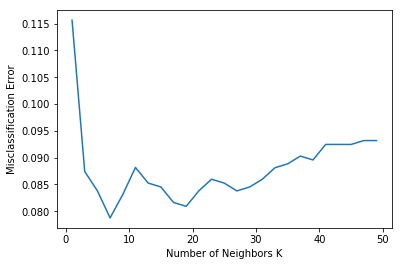

In [8]:
#creating odd list of K for KNN
#myList = list(range(1,50))

# subsetting just the odd ones
#neighbors = filter(lambda x: x % 2 != 0, myList)
neighbors = list(range(1,50,2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_bin_train, y_bin_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [9]:
clf = KNeighborsClassifier(n_neighbors=optimal_k)
clf.fit(X_bin_train, y_bin_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [10]:
# Accuracy of the model
accuracy = clf.score(X_bin_test, y_bin_test)
print("Accuracy of the model: %s" % accuracy)

Accuracy of the model: 0.8960468521229868


In [11]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Normalized confusion matrix


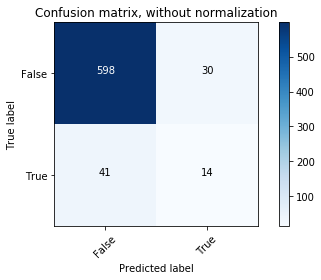

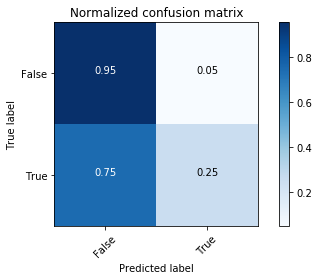

In [12]:
# Compute confusion matrix
y_bin_predict = clf.predict(X_bin_test)
cnf_matrix = confusion_matrix(y_bin_test, y_bin_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[False,True],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[False,True], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


#### Predicting

In [13]:
print("Binary classification with kNN \n")
y_kasios = clf.predict(X_kasios)
for i in range(len(y_kasios)):
    print("Kasios song n°%s : %s" % (i+1, y_kasios[i]))

Binary classification with kNN 

Kasios song n°1 : False
Kasios song n°2 : True
Kasios song n°3 : False
Kasios song n°4 : False
Kasios song n°5 : False
Kasios song n°6 : False
Kasios song n°7 : False
Kasios song n°8 : False
Kasios song n°9 : True
Kasios song n°10 : False
Kasios song n°11 : False
Kasios song n°12 : False
Kasios song n°13 : False
Kasios song n°14 : False
Kasios song n°15 : False


### 2)  Support Vector Machine (SVM)

#### Fitting

In [14]:
from sklearn import svm

In [15]:
x_list = np.linspace(2**-5, 2**5, 30)
accuracy_C = []
for x in x_list:
    model = svm.SVC(kernel='linear', C=x)
    model.fit(X_bin_train, y_bin_train)
    accuracy_C.append(model.score(X_bin_test, y_bin_test))
x = 0

# select the C with max accuracy
max_index = accuracy_C.index(max(accuracy_C))
C_chosed = x_list[max_index]

In [16]:
# we do the same thing for gamma
accuracy_gamma = []
for x in x_list:
    model = svm.SVC(kernel='linear', C=C_chosed, gamma=x)
    model.fit(X_bin_train, y_bin_train)
    accuracy_gamma.append(model.score(X_bin_test, y_bin_test))

# to find the C with the max accuracy
max_index = accuracy_gamma.index(max(accuracy_gamma))
gamma_chosed = x_list[max_index]  # the C that we will choose

In [17]:
# We can now define our SVM model
clf = svm.SVC(kernel='linear', C=C_chosed, gamma=gamma_chosed)
clf.fit(X_bin_train, y_bin_train)

SVC(C=0.03125, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
# Accuracy of the model
accuracy = clf.score(X_bin_test, y_bin_test)
print("Accuracy of the model: %s" % accuracy)

Accuracy of the model: 0.8638360175695461


Normalized confusion matrix


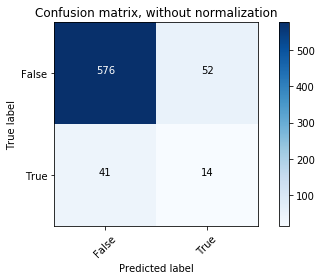

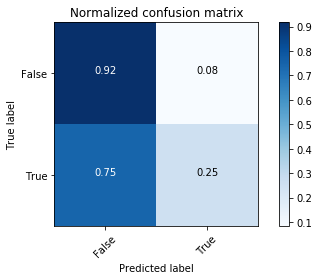

In [19]:
# Compute confusion matrix
y_bin_predict = clf.predict(X_bin_test)
cnf_matrix = confusion_matrix(y_bin_test, y_bin_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[False,True],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[False,True], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Predicting

In [20]:
y_kasios = clf.predict(X_kasios)
for i in range(len(y_kasios)):
    print("Kasios song n°%s : %s" % (i+1, y_kasios[i]))

Kasios song n°1 : False
Kasios song n°2 : True
Kasios song n°3 : False
Kasios song n°4 : False
Kasios song n°5 : False
Kasios song n°6 : False
Kasios song n°7 : False
Kasios song n°8 : True
Kasios song n°9 : True
Kasios song n°10 : True
Kasios song n°11 : True
Kasios song n°12 : False
Kasios song n°13 : True
Kasios song n°14 : False
Kasios song n°15 : False


### 3) Random Forest 

#### Fitting

In [21]:
from sklearn.ensemble import RandomForestClassifier

/home/ruth/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [22]:
clf = RandomForestClassifier(n_estimators=100, max_depth=7)

In [23]:
clf.fit(X_bin_train, y_bin_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Predicting

In [24]:
y_pred_train = clf.predict(X_bin_train)
y_pred_test = clf.predict(X_bin_test)

In [25]:
print(accuracy_score(y_bin_train, y_pred_train))
print("Accuracy: %s" % accuracy_score(y_bin_test,y_pred_test))

0.9869942196531792
Accuracy: 0.9267935578330894


Normalized confusion matrix


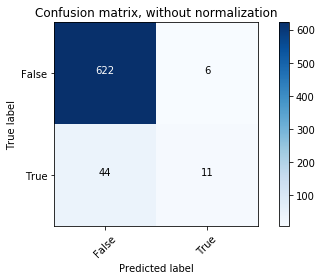

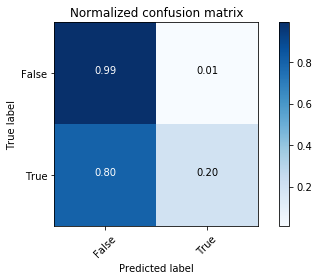

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_bin_test, y_pred_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[False,True],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[False,True], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [27]:
y_kasios = clf.predict(X_kasios)

In [28]:
print("Classification with Random Forest \n")
for i in range(len(y_kasios)):
    print("Kasios song n°%s : %s"% (i+1, y_kasios[i]))

Classification with Random Forest 

Kasios song n°1 : False
Kasios song n°2 : True
Kasios song n°3 : False
Kasios song n°4 : False
Kasios song n°5 : False
Kasios song n°6 : False
Kasios song n°7 : False
Kasios song n°8 : False
Kasios song n°9 : False
Kasios song n°10 : False
Kasios song n°11 : False
Kasios song n°12 : False
Kasios song n°13 : True
Kasios song n°14 : False
Kasios song n°15 : False


## II - Multi classification

### 1) k Nearest Neighbour (k-NN)

#### Fitting

The optimal number of neighbors is 17


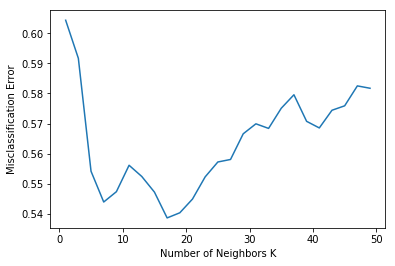

In [29]:
#creating odd list of K for KNN
#myList = list(range(1,50))

# subsetting just the odd ones
#neighbors = filter(lambda x: x % 2 != 0, myList)
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [30]:
clf = KNeighborsClassifier(n_neighbors=optimal_k)
clf.fit(X_train, y_train)

# Accuracy of the model
accuracy = clf.score(X_test, y_test)
print("Accuracy of the model: %s" % accuracy)

Accuracy of the model: 0.4480234260614934


Normalized confusion matrix


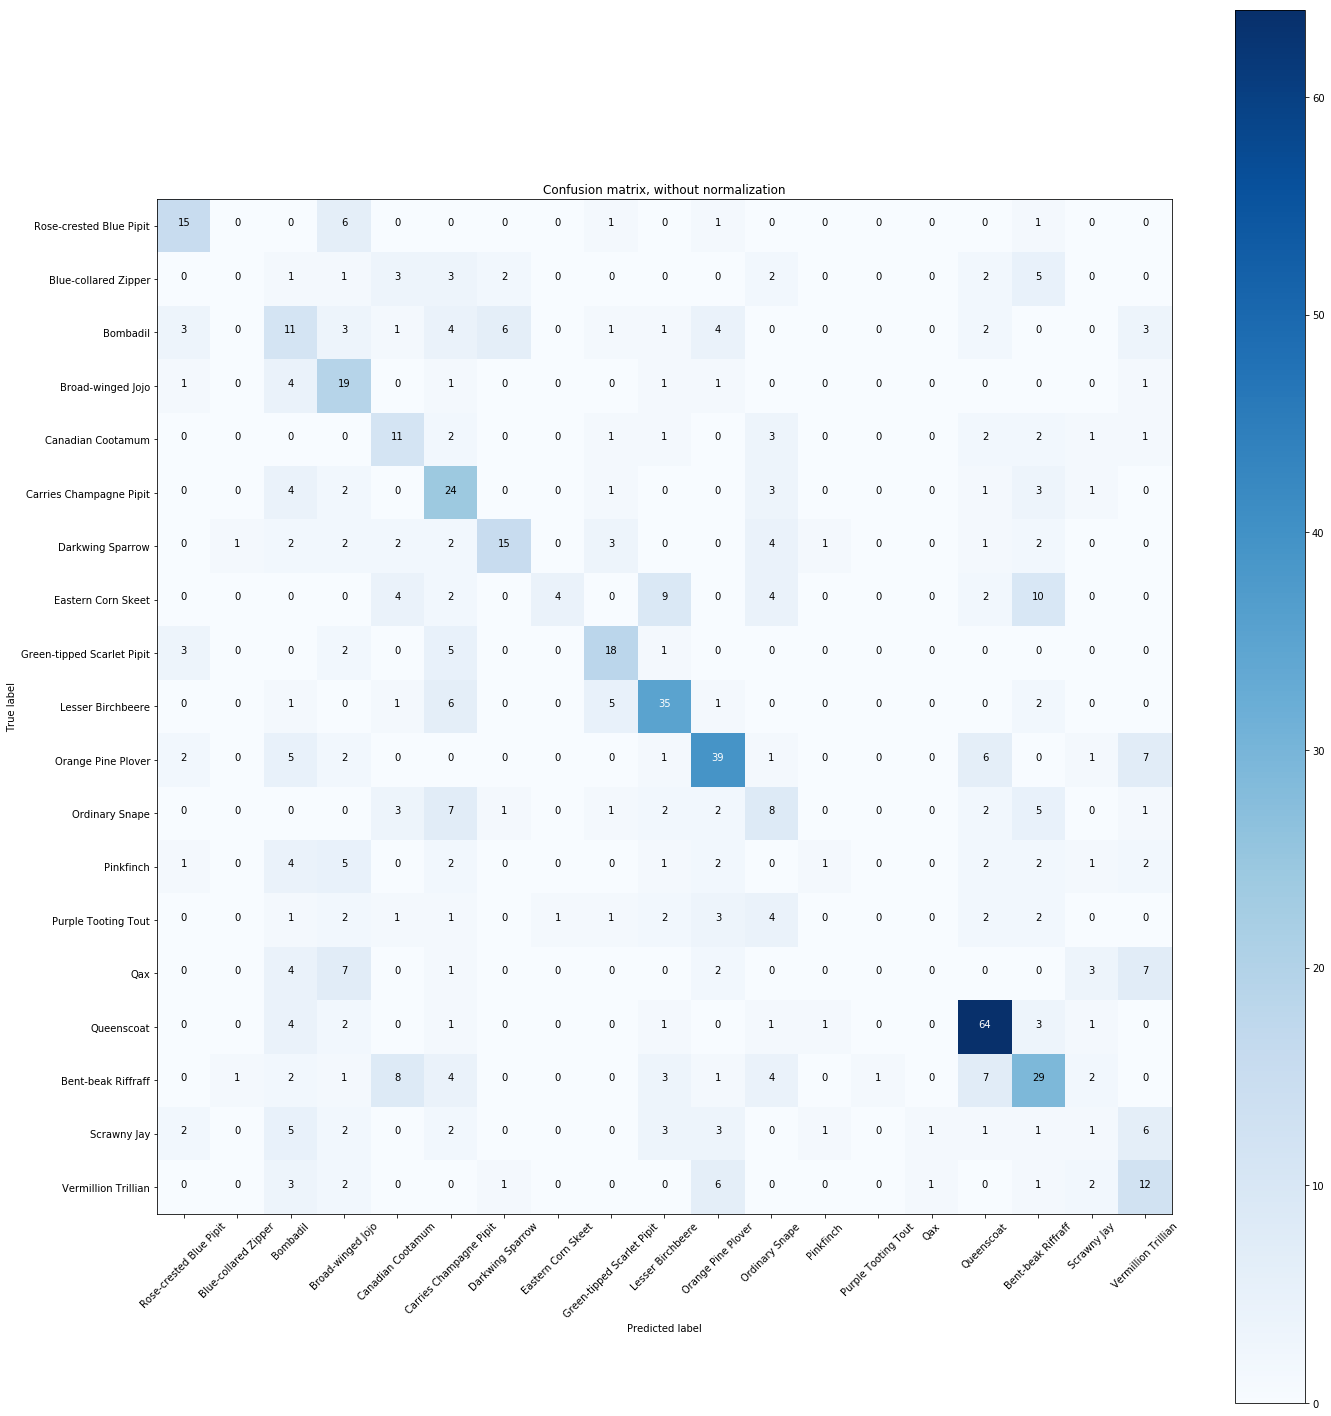

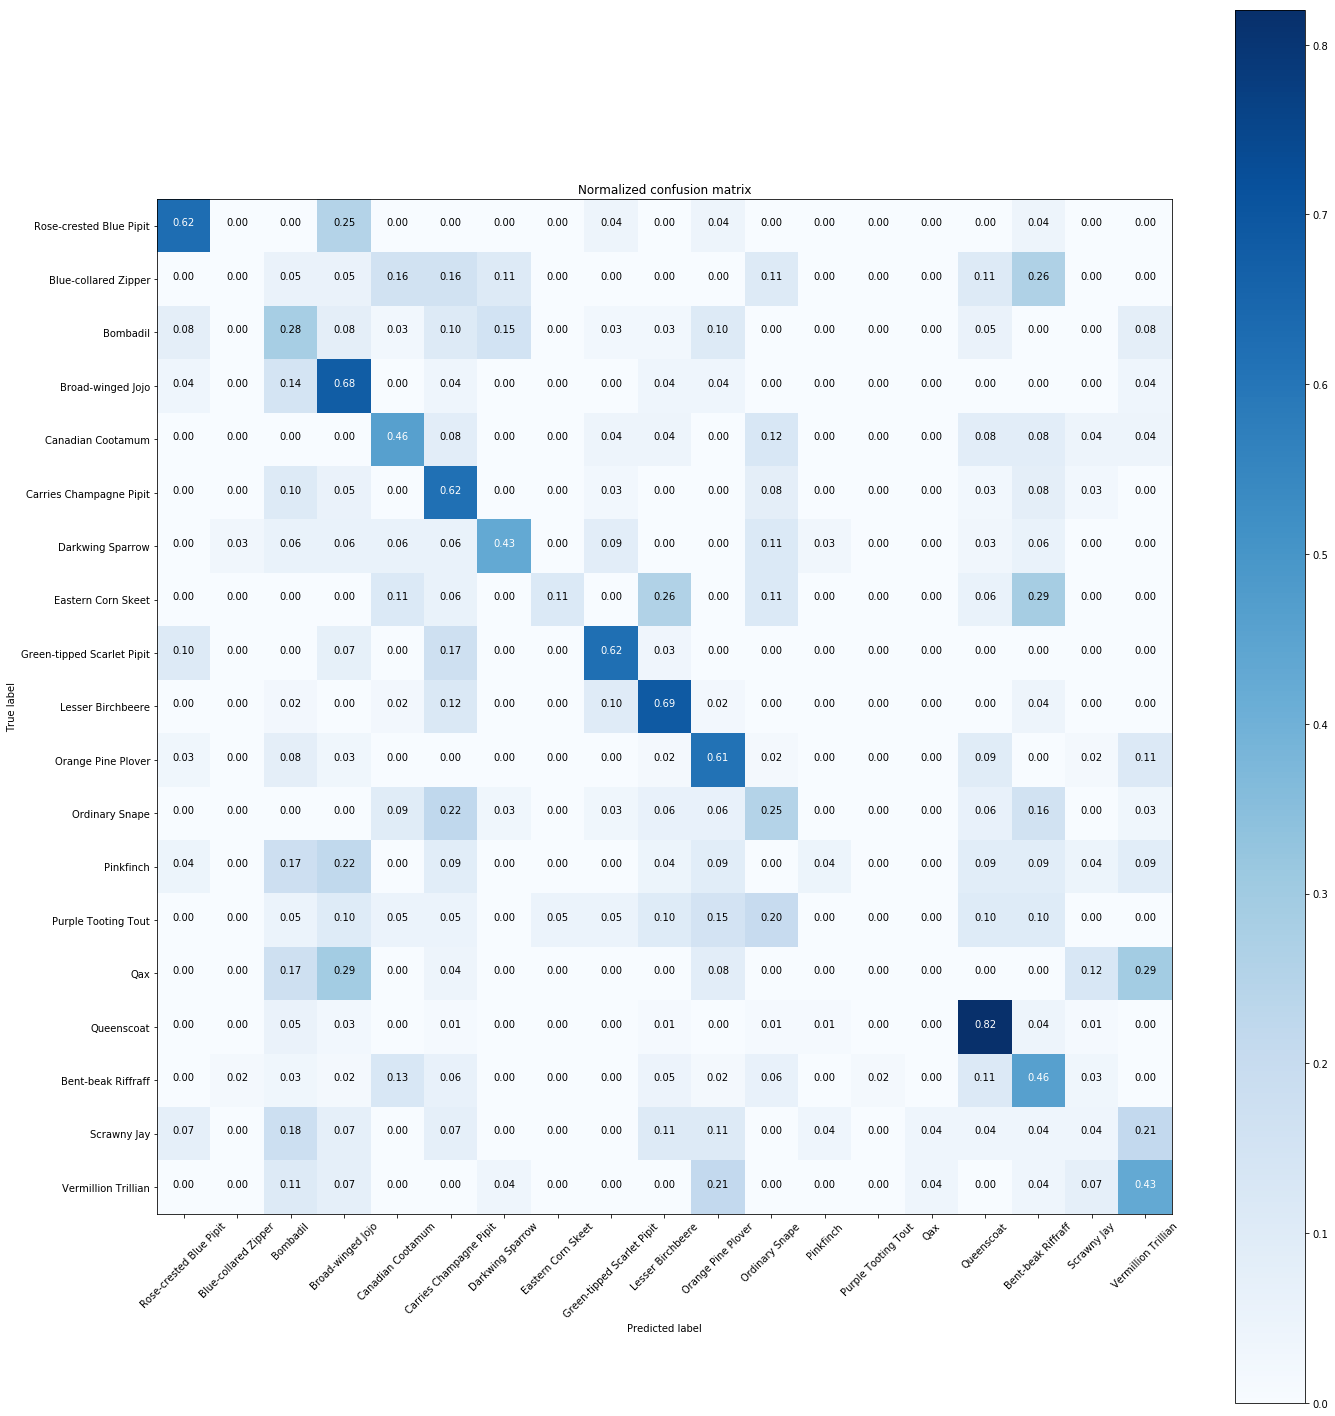

In [31]:
# Compute confusion matrix
y_predict = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=Y.unique(),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=Y.unique(), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Predicting

In [32]:
y_kasios = clf.predict(X_kasios)
for i in range(len(y_kasios)):
    print("Kasios song n°%s : %s" % (i+1, y_kasios[i]))

Kasios song n°1 : Broad-winged Jojo
Kasios song n°2 : Rose-crested Blue Pipit
Kasios song n°3 : Darkwing Sparrow
Kasios song n°4 : Darkwing Sparrow
Kasios song n°5 : Bombadil
Kasios song n°6 : Green-tipped Scarlet Pipit
Kasios song n°7 : Queenscoat
Kasios song n°8 : Lesser Birchbeere
Kasios song n°9 : Rose-crested Blue Pipit
Kasios song n°10 : Orange Pine Plover
Kasios song n°11 : Rose-crested Blue Pipit
Kasios song n°12 : Orange Pine Plover
Kasios song n°13 : Rose-crested Blue Pipit
Kasios song n°14 : Canadian Cootamum
Kasios song n°15 : Broad-winged Jojo


### 2)  Support Vector Machine (SVM)

#### Fitting

In [33]:
x_list = np.linspace(2**-5, 2**5, 30)
accuracy_C = []
for x in x_list:
    model = svm.SVC(kernel='linear', C=x)
    model.fit(X_train, y_train)
    accuracy_C.append(model.score(X_test, y_test))
x = 0

# select the C with max accuracy
max_index = accuracy_C.index(max(accuracy_C))
C_chosed = x_list[max_index]

In [34]:
# we do the same thing for gamma

accuracy_gamma = []
for x in x_list:
    model = svm.SVC(kernel='linear', C=C_chosed, gamma=x)
    model.fit(X_train, y_train)
    accuracy_gamma.append(model.score(X_test, y_test))

# to find the C with the max accuracy
max_index = accuracy_gamma.index(max(accuracy_gamma))
gamma_chosed = x_list[max_index]  # the C that we will choose

In [35]:
# We can now define our SVM model
clf = svm.SVC(kernel='linear', C=C_chosed, gamma=gamma_chosed)
clf.fit(X_train, y_train)

SVC(C=0.03125, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
# Accuracy of the model
accuracy = clf.score(X_test, y_test)
print("Accuracy of the model: %s" % accuracy)


Accuracy of the model: 0.404099560761347


Normalized confusion matrix


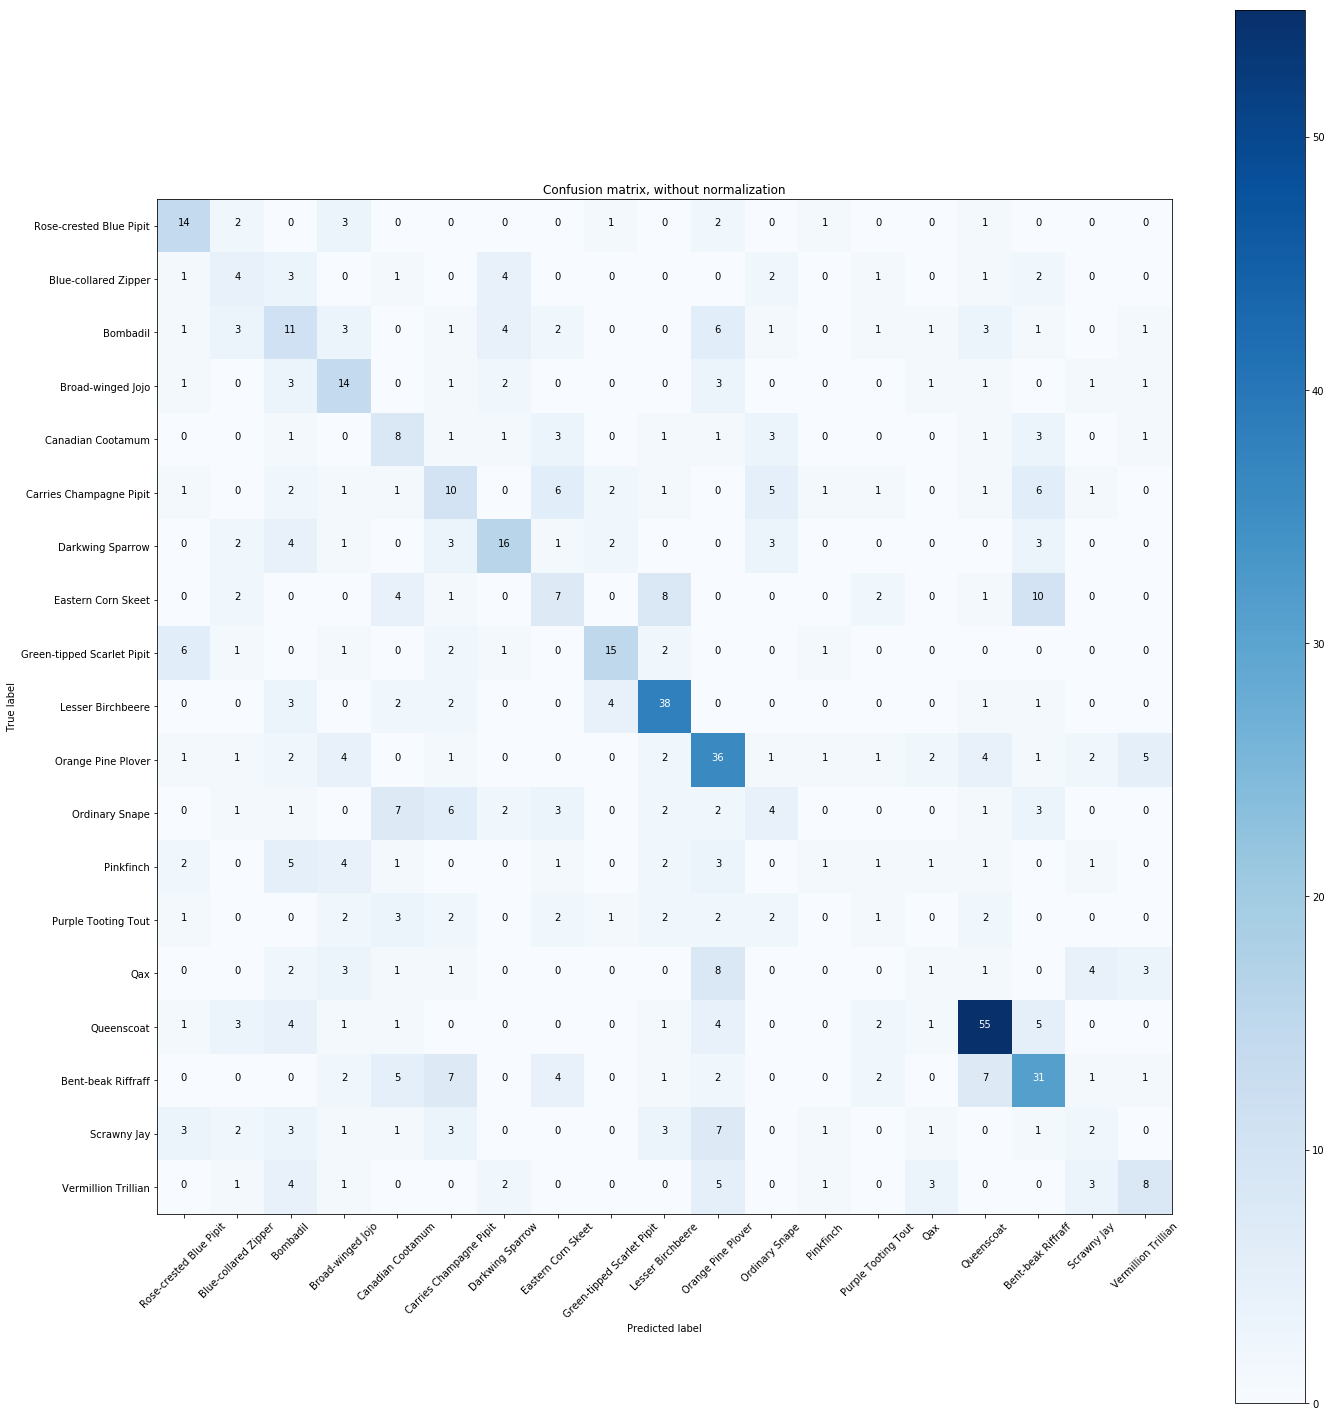

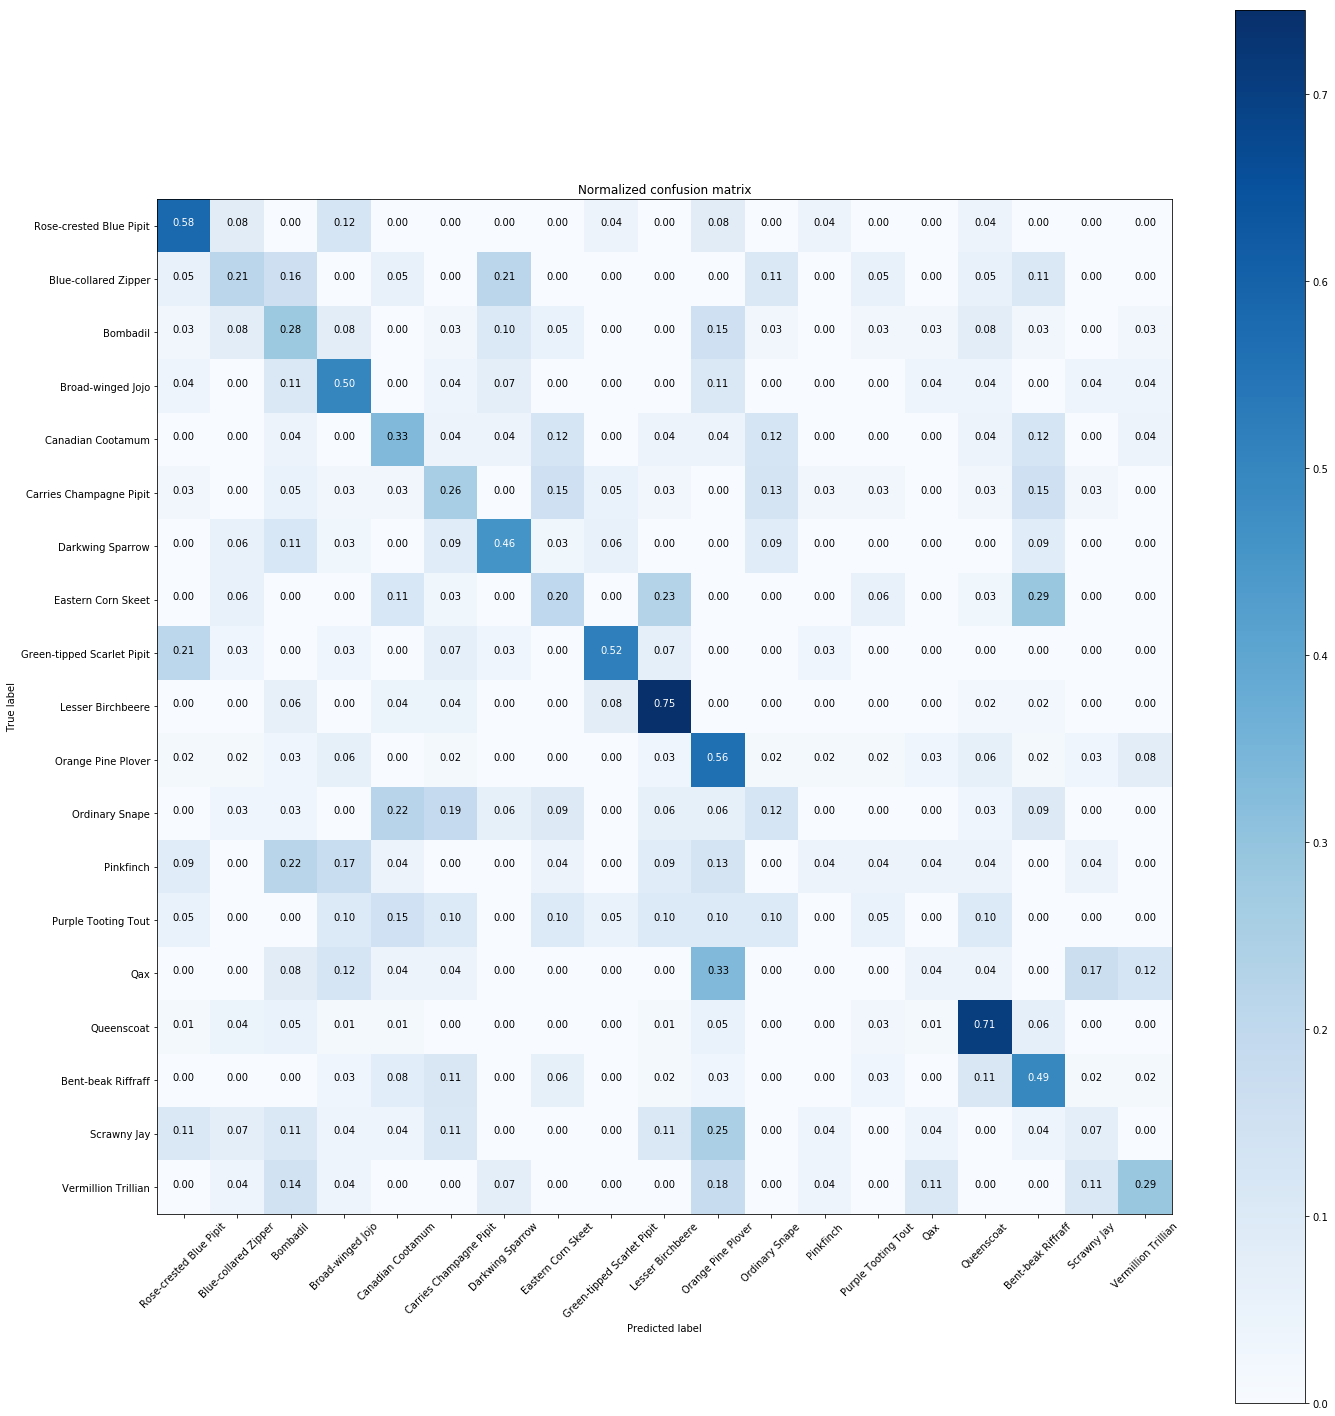

In [37]:
# Compute confusion matrix
y_predict = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=Y.unique(),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=Y.unique(), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Predicting

In [38]:
y_kasios = model.predict(X_kasios)
for i in range(len(y_kasios)):
    print("Kasios song n°%s : %s" % (i+1, y_kasios[i]))

Kasios song n°1 : Broad-winged Jojo
Kasios song n°2 : Ordinary Snape
Kasios song n°3 : Blue-collared Zipper
Kasios song n°4 : Blue-collared Zipper
Kasios song n°5 : Broad-winged Jojo
Kasios song n°6 : Bent-beak Riffraff
Kasios song n°7 : Eastern Corn Skeet
Kasios song n°8 : Lesser Birchbeere
Kasios song n°9 : Rose-crested Blue Pipit
Kasios song n°10 : Orange Pine Plover
Kasios song n°11 : Blue-collared Zipper
Kasios song n°12 : Orange Pine Plover
Kasios song n°13 : Rose-crested Blue Pipit
Kasios song n°14 : Darkwing Sparrow
Kasios song n°15 : Orange Pine Plover


### 3) Random Forest 

#### Fitting

In [39]:
clf = RandomForestClassifier(n_estimators=100, max_depth=7)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Predicting

Normalized confusion matrix


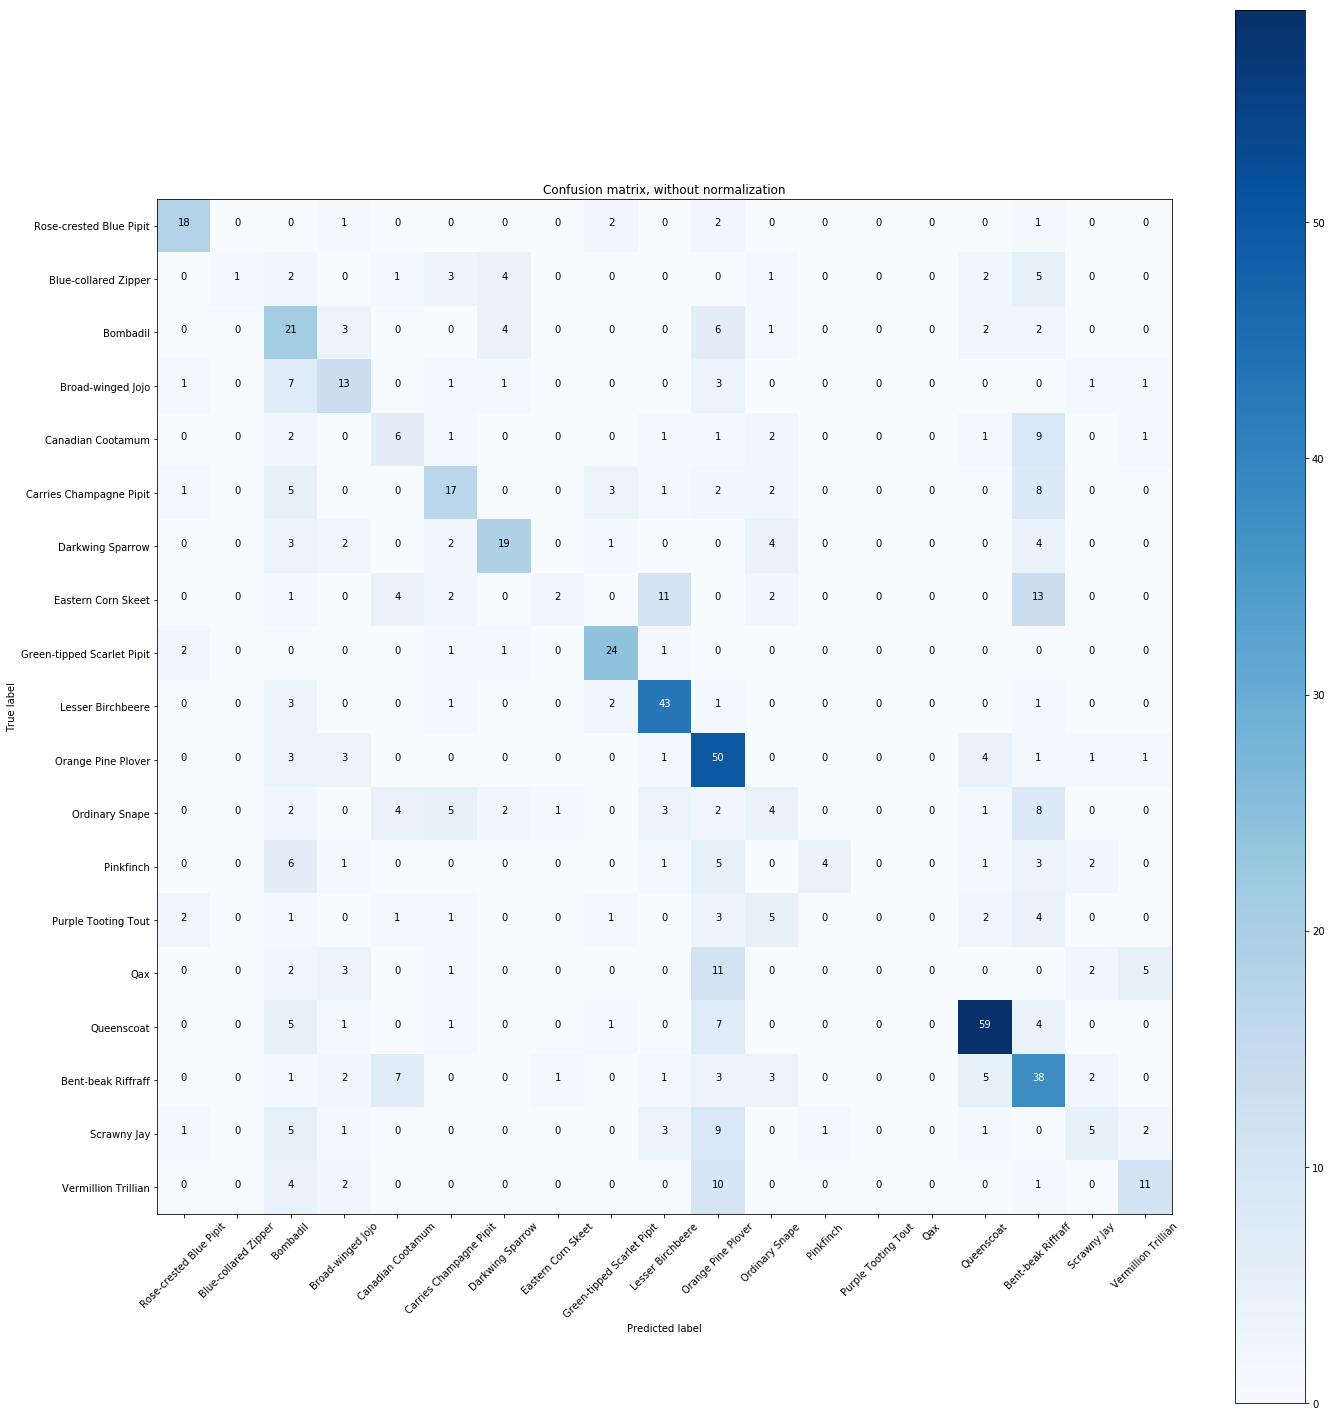

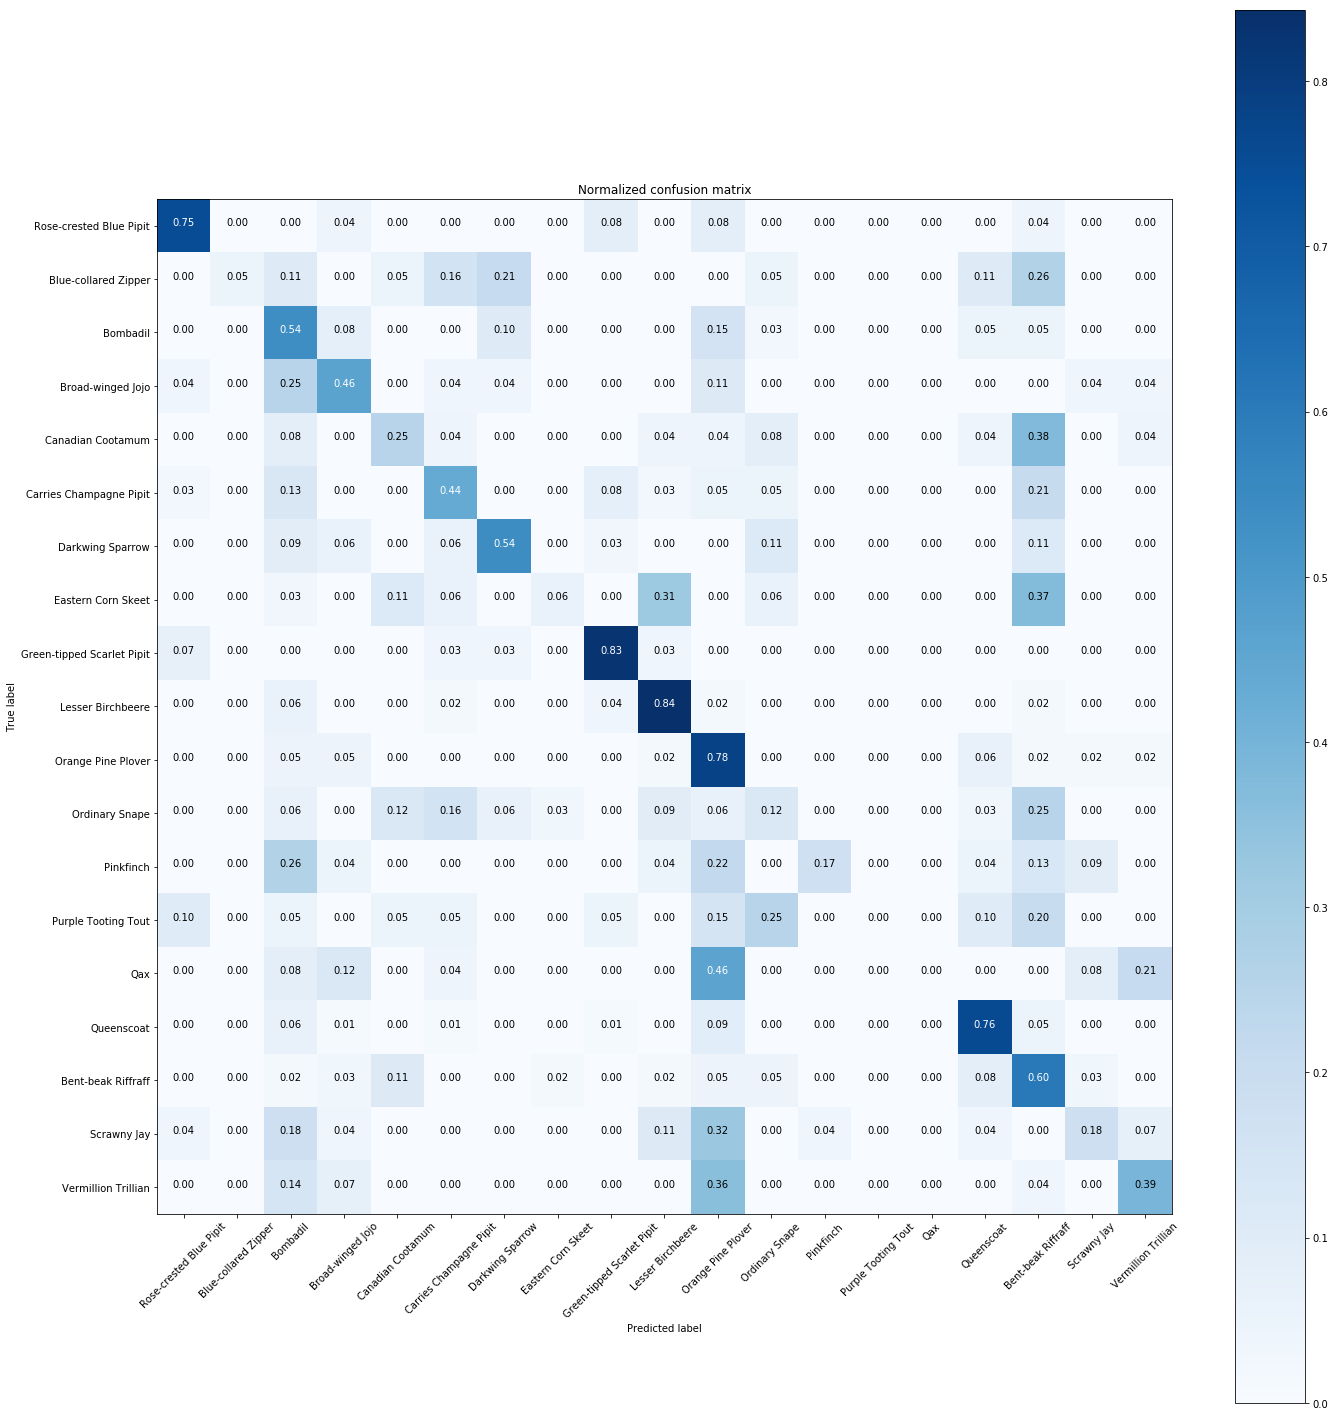

In [40]:
# Compute confusion matrix
y_pred_test = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=Y.unique(),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=Y.unique(), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [41]:
print(accuracy_score(y_train, y_pred_train))
print("Accuracy: %s" % accuracy_score(y_test,y_pred_test))

0.0
Accuracy: 0.4904831625183016


In [42]:
y_kasios = clf.predict(X_kasios)

In [43]:
print("Classification with Random Forest \n")
for i in range(len(y_kasios)):
    print("Kasios song n°%s : %s"% (i+1, y_kasios[i]))

Classification with Random Forest 

Kasios song n°1 : Bent-beak Riffraff
Kasios song n°2 : Rose-crested Blue Pipit
Kasios song n°3 : Bombadil
Kasios song n°4 : Darkwing Sparrow
Kasios song n°5 : Orange Pine Plover
Kasios song n°6 : Green-tipped Scarlet Pipit
Kasios song n°7 : Scrawny Jay
Kasios song n°8 : Lesser Birchbeere
Kasios song n°9 : Rose-crested Blue Pipit
Kasios song n°10 : Orange Pine Plover
Kasios song n°11 : Queenscoat
Kasios song n°12 : Orange Pine Plover
Kasios song n°13 : Rose-crested Blue Pipit
Kasios song n°14 : Darkwing Sparrow
Kasios song n°15 : Orange Pine Plover


## III - UMAP (visualization)

In [44]:
import umap

embedding = umap.UMAP(n_neighbors=10).fit_transform(pd.concat([X, X_kasios]))

In [45]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Category20
from bokeh.models import Legend

output_notebook()

Loading BokehJS ...

In [46]:
df_umap = pd.DataFrame(embedding, columns=('x', 'y'))
df_umap['specie'] = [specie for specie in Y] + ['Kasios Test Bird' for i in range(15)]
df_umap['kasios_index'] = [None for i in Y] + [i for i in range(1, 16)]


plot_figure = figure(
    title='UMAP projection of the birds songs',
    plot_width=800,
    plot_height=600,
    tools=('pan, wheel_zoom, reset'), 
    toolbar_location='above'
)

color_mapping = CategoricalColorMapper(factors=df_umap['specie'].unique(),
                                       palette=Category20[20])

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <span style='font-size: 13px; color: #224499'>Specie:</span>
        <span style='font-size: 13px'>@specie</span>
    </div>
</div>
"""))

legend_items = []

for specie in df_umap['specie'].unique():
    datasource = ColumnDataSource(df_umap.loc[df_umap['specie'] == specie])
    if specie == 'Kasios Test Bird':
        c = plot_figure.circle('x', 'y', source=datasource, color='black',
                               line_alpha=0.7, fill_alpha=0.7, size=20)

        plot_figure.text('x', 'y', text='kasios_index', x_offset=-5, y_offset=8,
                         source=datasource, text_font_size='10pt', text_color='white')
    else:
        c = plot_figure.circle('x', 'y', source=datasource,
                               color=dict(field='specie', transform=color_mapping),
                               line_alpha=0.6, fill_alpha=0.6, size=5)
        
    legend_items.append((specie, [c]))
    

legend = Legend(items=legend_items, location=(30, 50))
legend.click_policy = 'hide'
plot_figure.add_layout(legend, 'right')

show(plot_figure)

In [47]:
plot_figure = figure(
    title='UMAP projection of the birds songs',
    plot_width=800,
    plot_height=600,
    tools=('pan, wheel_zoom, reset'), 
    toolbar_location='above'
)

color_mapping = CategoricalColorMapper(factors=df_umap['specie'].unique(),
                                       palette=Category20[20])

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <span style='font-size: 13px; color: #224499'>Specie:</span>
        <span style='font-size: 13px'>@specie</span>
    </div>
</div>
"""))

legend_items = []

for specie in df_umap['specie'].unique():

    datasource = ColumnDataSource(df_umap.loc[df_umap['specie'] == specie])
    if specie == 'Kasios Test Bird':
        c = plot_figure.circle('x', 'y', source=datasource, color='black',
                               line_alpha=0.7, fill_alpha=0.7, size=20)

        plot_figure.text('x', 'y', text='kasios_index', x_offset=-5, y_offset=8,
                         source=datasource, text_font_size='10pt', text_color='white')
    else:
        c = plot_figure.circle('x', 'y', source=datasource,
                               color=dict(field='specie', transform=color_mapping),
                               muted_color=dict(field='specie', transform=color_mapping),
                               line_alpha=0.6, fill_alpha=0.6, size=5, muted_alpha=0.1)
        
    legend_items.append((specie, [c]))
    if specie != 'Rose-crested Blue Pipit': 
        c.muted = True
    
legend = Legend(items=legend_items, location=(30, 50))
legend.click_policy = 'hide'
plot_figure.add_layout(legend, 'right')

show(plot_figure)